In [1]:
import numpy as np
from elephant import spike_train_generation
from elephant import statistics
import quantities as pq
from scipy.stats import linregress
from scipy.interpolate import make_interp_spline
from neo.io import get_io
from neo import SpikeTrain
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


In [2]:
listFile = ['GrC_Subject15_180116/180116_0005 CC step.abf',
 'GrC_Subject06_090216/090216_0003 CC step.abf',
 'GrC_Subject10_111018/111018_0001 CC step.abf']

In [24]:

# Get Initial and Final spike frequency 
# IFC = [(final frequency - initial frequency)/ initial frequency]%
# initial frequency = spike frequency at the beginning of current injection 
# final frequency = spike frequency at the end of current injection 
# Adaptation, acceleration and absence of change or non-adapting, respectively correspond to IFC < 0, IFC > 0 and IFC = 0
#   

freqI=[]
freqF=[]
for file_path in listFile:
    l1=[]
    l2=[]
    data = get_io(file_path).read()
    for y, segment in enumerate(data[0].segments):
        seg=data[0].segments[y].analogsignals[0]
        time= seg.times
        spike_times=spike_train_generation.spike_extraction(seg)
        if y >=8 and y<=14: # condition on segment 
            train = SpikeTrain(spike_times, t_stop=time[-1], units='s')
            rateI = float(statistics.mean_firing_rate(train,t_start=time[0]+100*pq.ms,t_stop=time[0]+600*pq.ms).magnitude)
            rateF = float(statistics.mean_firing_rate(train,t_start=time[0]+1600*pq.ms,t_stop=time[0]+2100*pq.ms).magnitude)
            l1.append(rateI)
            l2.append(rateF)
    freqI.append(l1)
    freqF.append(l2)


listIFC=[]
for i in range(len(freqI)):
    l=[]
    for y in range(len(freqI[i])):
        a=(freqF[i][y]-freqI[i][y])
        b=freqI[i][y]
        
        ifc=(a/b)*100
        l.append(ifc)
    listIFC.append(l)



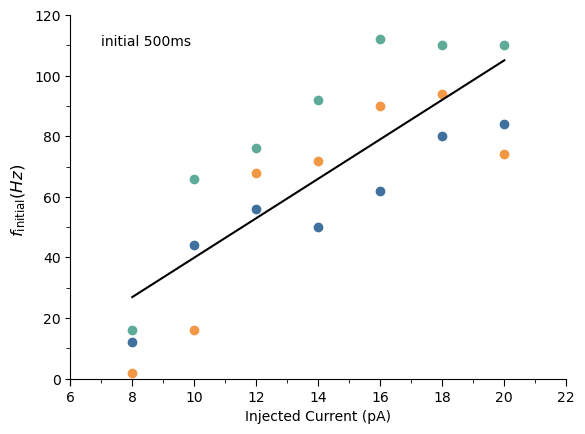

In [25]:
listCurrent= list(np.arange(8,22,2))
colors = ['#3f709e', '#5fab99', '#f29744' ]
legend =["Adapting","Non-Adapting","Accelerating"]


for i in range(len(freqI)):
    plt.scatter(listCurrent, freqI[i], label=legend[i], color=colors[i])

(a0,b0,r0,_0,_0)= linregress(listCurrent, freqI[0])
(a1,b1,r1,_1,_1)= linregress(listCurrent, freqI[1])
(a2,b2,r2,_2,_2)= linregress(listCurrent, freqI[2])

a=(a0+a1+a2)/3
b=(b0+b1+b2)/3
r=round((r0+r1+r2)/3,2)

plt.plot([listCurrent[0], listCurrent[-1]],[a * listCurrent[0] + b, a * listCurrent[-1] + b], "k-",label="regression: r^2 ={:8.5f}".format(r))

ax = plt.gca()

ax.set_xticks([6, 8, 10, 12, 14, 16, 18, 20, 22])  
ax.tick_params(axis='x', which='major', size=5) 
ax.set_xticks([7, 9, 11, 13, 15, 17, 19, 21, 23], minor=True) 
ax.tick_params(axis='x', which='minor', size=3)  
ax.set_xlim(6, 22)  
plt.xlabel('Injected Current (pA)')


ax.set_ylabel(r'$f_{\text{initial}}(Hz)$', fontsize=12)
plt.ylim(-2,120)
ax.set_yticks([10, 30, 50, 70, 90, 110], minor=True) 
ax.tick_params(axis='y', which='minor', size=3)  

ax.spines['left'].set_position(('data', 6))
ax.spines['bottom'].set_position(('data', 0))
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.text(7, 110, r'initial 500ms') 
#plt.legend()
plt.show()

